In [ ]:
!pip install pyspark

In [ ]:
import pyspark
sc = pyspark.SparkContext(appName="Spark Donald Trump Communication Analysis on Twitter")

In [ ]:
#data load function
def loadData(path):
    rdd = sc.textFile(path)\
            .flatMap(lambda lines: lines.lower().split())\
            .flatMap(lambda word: word.split(","))\
            .flatMap(lambda word : word.split("."))\
            .flatMap(lambda word : word.split(";"))\
            .flatMap(lambda word : word.split(":"))\
            .flatMap(lambda word : word.split("?"))\
            .flatMap(lambda word : word.split("!"))\
            .flatMap(lambda word : word.split("\""))\
            .flatMap(lambda word : word.split("-"))\
            .flatMap(lambda word : word.split("\'"))\
            .filter(filterWord)\
            .map(lambda word: (word, 1))\
            .reduceByKey( lambda count1, count2 : count1 + count2 ) \
            .map(lambda data: Row(label=data[0], length=len(data[0]), freq=data[1]))
    
    return spark.createDataFrame(rdd)

In [ ]:
!curl -O https://raw.githubusercontent.com/deepjavalibrary/d2l-java/master/tools/fix-colab-gpu.sh && bash fix-colab-gpu.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   155  100   155    0     0    622      0 --:--:-- --:--:-- --:--:--   622
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!curl -O https://raw.githubusercontent.com/deepjavalibrary/d2l-java/master/tools/colab_build.sh && bash colab_build.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   520  100   520    0     0   2841      0 --:--:-- --:--:-- --:--:--  2841
Update environment...
Install Java...
Install Jupyter java kernel...


In [ ]:
!pip install jupyter

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## first read the trump_tweets.txt file into the RDD rdd_tweets

rdd_tweets = sc.textFile('/content/gdrive/MyDrive/Spark_trump/trump_tweets.txt')

# print a sample of 10 lines of rdd_tweets

rdd_tweets.take(10)

['Republicans and Democrats have both created our economic problems.;02/08/2011 18:07:48',
 'I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! #KAG2020 https://t.co/dNJZfRsl9y;03/03/2020 01:34:50',
 'RT @CBS_Herridge: READ: Letter to surveillance court obtained by CBS News questions where there will be further disciplinary action and cho…;17/01/2020 03:22:47',
 'The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp  the Democrats know it. Almost all recent elections using this system, even though much smaller &amp   with far fewer Ballots to count, have ended up being a disaster. Large numbers of missing Ballots &amp  Fraud!;12/09/2020 20:10:58',
 "RT @MZHemingway: Very friendly telling of events here about Comey's apparent leaking to compliant media. If you read those 

In [ ]:
## Split each tweet into a list of string (1)

# Import Regular Expressions library
import re

# Define a function to split the tweets into a word list
def split_with_multiple_separator(string_value): 
     return re.compile(r'(?<!\d{2}):|(?<!\w)\.(?!\w)|,| |\[|\]|;|\"|!|--|–|“|(?=\.\s)|(?=\.;)')\
                     .split(string_value.strip())
                    # Negative lookahead assertion : '(?<!\d{2}):' for time (hh:mm:ss) ;
                    #                            '(?<!\w)\.(?!\w)' for specific word with '.' in bewtween (e.g. U.S.)
                    # Positive lookahead assertion : '(?=\.\s)' for full stop followed by whitespace
                    #                                '(?=\.;)' for full stop followed by a colon(:)
                    # Other will be splited by , or [ or ] or ; or "or ! or -- or – or “

In [ ]:
## Split each tweet into a list of string (2)

# Split the tweets into a word list and filter the punctuation
rdd_tweets_words = rdd_tweets.flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')
rdd_tweets_words.take(60)

['Republicans',
 'and',
 'Democrats',
 'have',
 'both',
 'created',
 'our',
 'economic',
 'problems',
 '02/08/2011',
 '18:07:48',
 'I',
 'was',
 'thrilled',
 'to',
 'be',
 'back',
 'in',
 'the',
 'Great',
 'city',
 'of',
 'Charlotte',
 'North',
 'Carolina',
 'with',
 'thousands',
 'of',
 'hardworking',
 'American',
 'Patriots',
 'who',
 'love',
 'our',
 'Country',
 'cherish',
 'our',
 'values',
 'respect',
 'our',
 'laws',
 'and',
 'always',
 'put',
 'AMERICA',
 'FIRST',
 'Thank',
 'you',
 'for',
 'a',
 'wonderful',
 'evening',
 '#KAG2020',
 'https',
 '//t.co/dNJZfRsl9y',
 '03/03/2020',
 '01:34:50',
 'RT',
 '@CBS_Herridge',
 'READ']

In [ ]:
## Delete the 'http://' contents (1)

#Create a function to delete "https"
delsite = ["https","//","http"]
def delhttps(line):
    for i in delsite:
        if i in line:
            return 1
    return 0

In [ ]:
## Delete the 'http://' contents (2)

rdd_tweets_words_noweb = rdd_tweets_words.filter(lambda line: delhttps(line) != 1)
rdd_tweets_words_noweb.take(60)

['Republicans',
 'and',
 'Democrats',
 'have',
 'both',
 'created',
 'our',
 'economic',
 'problems',
 '02/08/2011',
 '18:07:48',
 'I',
 'was',
 'thrilled',
 'to',
 'be',
 'back',
 'in',
 'the',
 'Great',
 'city',
 'of',
 'Charlotte',
 'North',
 'Carolina',
 'with',
 'thousands',
 'of',
 'hardworking',
 'American',
 'Patriots',
 'who',
 'love',
 'our',
 'Country',
 'cherish',
 'our',
 'values',
 'respect',
 'our',
 'laws',
 'and',
 'always',
 'put',
 'AMERICA',
 'FIRST',
 'Thank',
 'you',
 'for',
 'a',
 'wonderful',
 'evening',
 '#KAG2020',
 '03/03/2020',
 '01:34:50',
 'RT',
 '@CBS_Herridge',
 'READ',
 'Letter',
 'to']

In [ ]:
#transform all the words into lowercase
rdd_tweets_words_lower = rdd_tweets_words_noweb.flatMap(lambda word:word.lower().split())
rdd_tweets_words_lower.take(10)

['republicans',
 'and',
 'democrats',
 'have',
 'both',
 'created',
 'our',
 'economic',
 'problems',
 '02/08/2011']

In [ ]:
print (f'There are {rdd_tweets.count()} tweets in total from 2009 to 2020.') 

There are 58681 tweets in total from 2009 to 2020.


In [ ]:

## Split each tweet into words (keeping @ and #)
words = rdd_tweets.flatMap(lambda word:re.split(',| |\[|\]|,|:|;|\.|\"', word.strip())).flatMap(lambda line: line.split(" "))

## Filter the words to get only hashtags
hashtags = words.filter(lambda w: '#' in w)

# Filter the words to get only hashtags, then map each hashtag to be a pair of (hashtag,1)
hashtags_tuple = hashtags.map(lambda x: (x, 1))
hashtags_tuple.take(10)

[('#KAG2020', 1),
 ('#MAGA', 1),
 ('#VOTE', 1),
 ('#MAGA🇺🇸🦅rally', 1),
 ('#VOTE', 1),
 ('#2A', 1),
 ('#VOTE', 1),
 ('#MAGA', 1),
 ('#VoteEarlyDay', 1),
 ('#MAGA🇺🇸', 1)]

In [ ]:
## Top 10 Hashtags (#)

hashtags_count = hashtags_tuple.reduceByKey(lambda x,y : x+y).sortBy(lambda tuple: tuple[1], ascending=False)
hashtags_count.take(10)

[('#Trump2016', 695),
 ('#MAGA', 436),
 ('#MakeAmericaGreatAgain', 392),
 ('#CelebApprentice', 283),
 ('#1', 136),
 ('#CelebrityApprentice', 131),
 ('#TimeToGetTough', 95),
 ('#AmericaFirst', 76),
 ('#Trump', 74),
 ('#Trump2016https', 66)]

In [ ]:
## Filter the words to get only references
references = words.filter(lambda w: '@' in w)

# Map each reference to be a pair of (reference,1)
references_tuple = references.map(lambda x: (x, 1))
references_tuple.take(10)

[('@CBS_Herridge', 1),
 ('@MZHemingway', 1),
 ('@WhiteHouse', 1),
 ('@realDonaldTrump', 1),
 ('@EricTrump', 1),
 ('@GOPChairwoman', 1),
 ('@realDonaldTrump', 1),
 ('@TomFitton', 1),
 ('@RealDonaldTrump', 1),
 ('@marklevinshow', 1)]

In [ ]:
## Top 10 references (@)

references_count = references_tuple.reduceByKey(lambda x,y : x+y).sortBy(lambda tuple: tuple[1], ascending=False)
references_count.take(10)

[('@realDonaldTrump', 10486),
 ('@FoxNews', 876),
 ('@WhiteHouse', 793),
 ('@foxandfriends', 690),
 ('@BarackObama', 563),
 ('@CNN', 377),
 ('@ApprenticeNBC', 364),
 ('@TeamTrump', 294),
 ('@IvankaTrump', 288),
 ('@seanhannity', 266)]

In [ ]:
## Initialize an rdd with key/value for counting each word in the cleaned RDD 

# Add the count to the word as a tuple
rdd_tweets_words_kv = rdd_tweets_words_lower.map(lambda word: (word, 1))

rdd_tweets_words_kv.take(10)

[('republicans', 1),
 ('and', 1),
 ('democrats', 1),
 ('have', 1),
 ('both', 1),
 ('created', 1),
 ('our', 1),
 ('economic', 1),
 ('problems', 1),
 ('02/08/2011', 1)]

In [ ]:
## Read the positive words file

rdd_positive_words = sc.textFile('/content/gdrive/MyDrive/Spark_trump/positive-words.txt')

# Initialize an rdd with key/value for counting each positive word in the file 

rdd_positive_words_kv = rdd_positive_words.map(lambda word: (word, 1))

rdd_positive_words_kv.take(5)

[('a+', 1), ('abound', 1), ('abounds', 1), ('abundance', 1), ('abundant', 1)]

In [ ]:
## Join the cleaned word list with the positive word list
# Use the mapValues transformation to assign a default count of 1 for each positive word

rdd_positive_words_tweets_kv = rdd_tweets_words_kv.join(rdd_positive_words_kv).mapValues(lambda tuple: 1)

## Count the number of occurences of each positive word in tweets

rdd_positive_words_tweets_count_kv = rdd_positive_words_tweets_kv.reduceByKey(lambda x,y : x+y)

rdd_positive_words_tweets_count_kv.take(5)

[('thrilled', 51),
 ('wonderful', 482),
 ('right', 897),
 ('sustainable', 3),
 ('best', 1236)]

In [ ]:
## Top 25 Positive Words

rdd_positive_words_tweets_count_kv_ordered = rdd_positive_words_tweets_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_positives_opinion = rdd_positive_words_tweets_count_kv_ordered.take(25)
list_top_positives_opinion

[('great', 7413),
 ('trump', 5898),
 ('thank', 3516),
 ('like', 1992),
 ('good', 1810),
 ('best', 1236),
 ('love', 1151),
 ('win', 1071),
 ('work', 983),
 ('right', 897),
 ('better', 840),
 ('well', 733),
 ('strong', 725),
 ('support', 661),
 ('amazing', 643),
 ('congratulations', 598),
 ('happy', 579),
 ('nice', 563),
 ('honor', 499),
 ('wow', 497),
 ('wonderful', 482),
 ('endorsement', 460),
 ('enjoy', 449),
 ('beautiful', 436),
 ('fantastic', 419)]

In [ ]:
## Read the positive words file

rdd_negative_words = sc.textFile('/content/gdrive/MyDrive/Spark_trump/negative-words.txt')

# initialize an rdd with key/value for counting each negative word in the file 

rdd_negative_words_kv = rdd_negative_words.map(lambda word: (word, 1))

rdd_negative_words_kv.take(5)

[('2-faced', 1),
 ('2-faces', 1),
 ('abnormal', 1),
 ('abolish', 1),
 ('abominable', 1)]

In [ ]:
## Join the cleaned word list with the negative word list
# Use the mapValues transformation to assign a default count of 1 for each negative word

rdd_negative_words_tweets_kv = rdd_tweets_words_kv.join(rdd_negative_words_kv).mapValues(lambda tuple:1)

rdd_negative_words_tweets_kv.take(5)

[('threat', 1), ('threat', 1), ('threat', 1), ('threat', 1), ('threat', 1)]

In [ ]:
## Count the number of occurences of each negative word in tweets

rdd_negative_words_tweets_count_kv = rdd_negative_words_tweets_kv.reduceByKey(lambda x,y: x+y)

rdd_negative_words_tweets_count_kv.take(5)

[('threat', 84),
 ('disaster', 298),
 ('fraud', 196),
 ('worse', 231),
 ('dishonest', 205)]

In [ ]:
## Top 25 Negative Words

rdd_negative_words_tweets_count_kv_ordered = rdd_negative_words_tweets_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_negatives_opinion = rdd_negative_words_tweets_count_kv_ordered.take(25)

list_top_negatives_opinion

[('fake', 1210),
 ('bad', 987),
 ('hard', 746),
 ('crime', 541),
 ('crooked', 445),
 ('wrong', 435),
 ('illegal', 414),
 ('radical', 385),
 ('terrible', 378),
 ('lost', 363),
 ('corrupt', 351),
 ('sad', 330),
 ('collusion', 330),
 ('disaster', 298),
 ('crazy', 288),
 ('problem', 286),
 ('hoax', 283),
 ('attack', 276),
 ('miss', 276),
 ('failed', 267),
 ('badly', 256),
 ('failing', 254),
 ('worst', 253),
 ('weak', 233),
 ('worse', 231)]

In [ ]:
## Create a function for plotting a bar chart presenting top positives and top negatives words


from matplotlib import pyplot as plt
import seaborn as sb

import pandas as pd

def plot_opinion(list_positives, list_negatives):
    
    list_1 = [(t[0], t[1], 'positive') for t in list_positives]
    list_2 = [(t[0], t[1], 'negative') for t in list_negatives]
    
     
    list_1.extend(list_2)
    
    
    pd_df = pd.DataFrame({
     'Opinion': [ t[0] for t in list_1 ], # column for words
     'Count': [ t[1] for t in list_1 ],   # column for no. of count
     'polarity': [ t[2] for t in list_1 ] # column for the polarity of the word, i.e. positive/ negative
    }).sort_values('Count', ascending=False)
    
    pd_df['color'] = pd_df.polarity.apply(lambda polarity: 'green' if polarity=='positive' else 'red')
    
    plt.figure( figsize = (15, 8) )
    chart=sb.barplot(data=pd_df, x='Opinion', y='Count', hue='polarity', palette=["green", "red"], order=pd_df['Opinion'])
    chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=80, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
    )
    
    for tick, color in zip(chart.get_xticklabels(), pd_df['color']): 
        tick.set_color(color)
    
    plt.show()

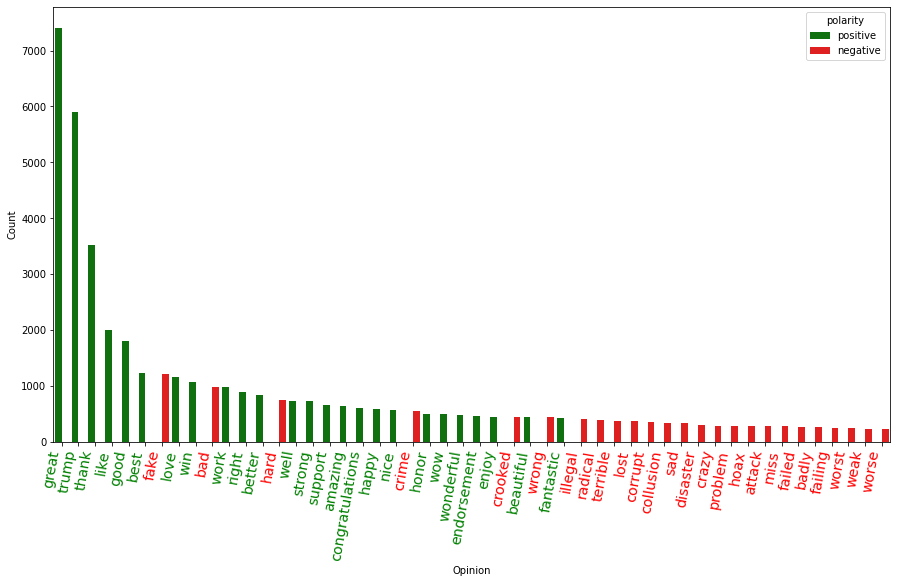

In [ ]:
plot_opinion(list_top_positives_opinion, list_top_negatives_opinion)

In [ ]:
## Compute the global sentiment score

# sentiment score = count of positive words used - count of negative words used
sentiment_score = rdd_positive_words_tweets_count_kv.map(lambda tuple: tuple[1]).sum()\
                  - rdd_negative_words_tweets_count_kv.map(lambda tuple: tuple[1]).sum()

print('The sentiment score is : ',sentiment_score)

The sentiment score is :  25362


In [ ]:
## Read the stop words file

# We have added extra stop words, refer to the 'stop-words.txt'
rdd_stop_words = sc.textFile('/content/gdrive/MyDrive/Spark_trump/stop-words.txt')

rdd_stop_words.take(5)

['a', 'about', 'above', 'across', 'after']

In [ ]:
## Get the contextual words

# contextual words = all words in the tweets - positive words - negative words - stop words - references(@) - hashtags(#)
contextual_words = rdd_tweets_words_lower.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags)
contextual_words.take(5)

['&amp', '&amp', '&amp', '&amp', '&amp']

In [ ]:
## Top 50 Hot Topics / Contextual Words

contextual_words_count_ordered = contextual_words.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

list_top_contextual_words = contextual_words_count_ordered.take(50)  

list_top_contextual_words

[('rt', 9799),
 ('&amp', 5460),
 ('president', 4325),
 ('people', 3287),
 ('just', 3284),
 ('new', 2466),
 ('country', 2159),
 ('america', 2109),
 ('big', 2039),
 ('thanks', 1875),
 ('make', 1835),
 ('donald', 1834),
 ('time', 1831),
 ('news', 1742),
 ('democrats', 1680),
 ('obama', 1621),
 ('vote', 1619),
 ('today', 1574),
 ('going', 1509),
 ('want', 1395),
 ('american', 1389),
 ('job', 1224),
 ('years', 1216),
 ('run', 1209),
 ('need', 1201),
 ('doing', 1134),
 ('u.s', 1121),
 ('think', 1111),
 ('china', 1104),
 ('media', 1100),
 ('really', 1083),
 ('did', 1071),
 ('way', 1067),
 ('know', 1059),
 ('day', 1040),
 ('house', 1021),
 ('jobs', 997),
 ('said', 985),
 ('border', 946),
 ('true', 943),
 ('states', 941),
 ('state', 934),
 ('election', 916),
 ('deal', 909),
 ("don't", 904),
 ('biden', 900),
 ('world', 898),
 ('hillary', 887),
 ('tonight', 886),
 ('watch', 873)]

In [ ]:
## Create a function for plotting a bar chart of the Top 50 Contextual Words

def plot_contextual_words(list_contextual_words):
    
    pd_df = pd.DataFrame({
        'Word':  [ t[0] for t in list_contextual_words ],
        'Count': [ t[1] for t in list_contextual_words ]
    }).sort_values('Count', ascending=False)
    
    plt.figure( figsize = (15, 8) )
    
    chart=sb.barplot(data=pd_df, x='Word', y='Count', order=pd_df['Word'], color='blue')
    
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=80, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large',
        )
    
    plt.show()

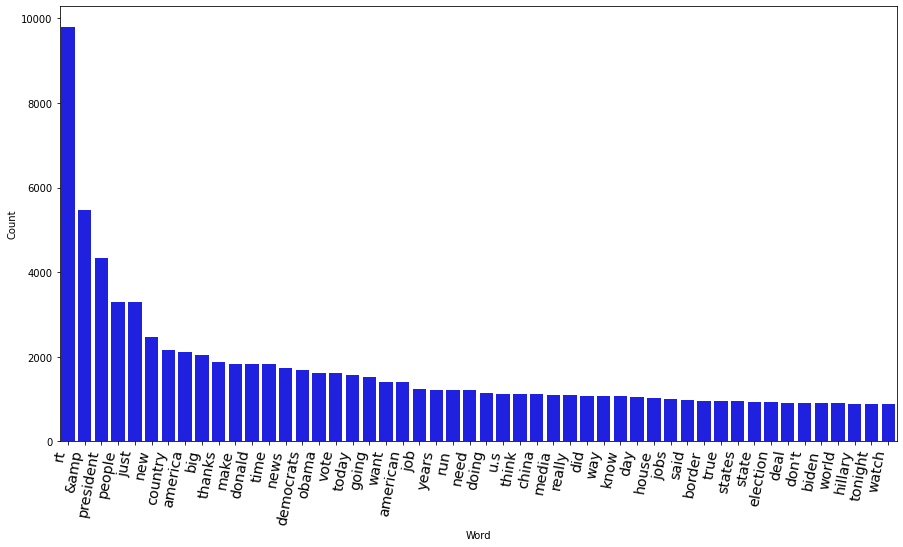

In [ ]:
## Plot of Top 50 Contextual Words in Donald Trump's tweets

plot_contextual_words(list_top_contextual_words)

In [ ]:
# Filter the Original tweets
rdd_original_tweets  = rdd_tweets.filter(lambda line: "RT" not in line)

# Filter the Retweets

rdd_retweets = rdd_tweets.filter(lambda line: "RT" in line)

In [ ]:
# Number of original tweets

number_of_ot = rdd_original_tweets.count()
number_of_ot

48618

In [ ]:
# Number of retweets

number_of_rt = rdd_retweets.count()
number_of_rt

10063

In [ ]:
# The ratio of original tweet to retweet

import math

ratio_of_retweet = number_of_ot / number_of_rt
print (f'The ratio of original tweet to retweet is : {ratio_of_retweet}')
print (f'For every retweet , there are {math.trunc(ratio_of_retweet)} original tweets' )

The ratio of original tweet to retweet is : 4.831362416774322
For every retweet , there are 4 original tweets


In [ ]:
# Split each tweet into words
words_ot = rdd_original_tweets.flatMap(lambda word:re.split(',| |\[|\]|,|:|;|\.|\"', word.strip())).flatMap(lambda line: line.split(' '))

# Filter the words to get only hashtags, then map each hashtag to be a pair of (hashtag,1)
hashtags_ot = words_ot.filter(lambda w: '#' in w).map(lambda x: (x, 1))

## Top 10 Hashtags of Original tweets
hashtags_ot_count = hashtags_ot.reduceByKey(lambda x,y : x+y).sortBy(lambda tuple: tuple[1], ascending=False)
hashtags_ot_count.take(10)

[('#Trump2016', 681),
 ('#MakeAmericaGreatAgain', 378),
 ('#MAGA', 367),
 ('#CelebApprentice', 282),
 ('#CelebrityApprentice', 131),
 ('#1', 130),
 ('#TimeToGetTough', 95),
 ('#Trump2016https', 65),
 ('#VoteTrump', 64),
 ('#AmericaFirst', 64)]

In [ ]:
# Filter the words to get only references, then map each reference to be a pair of (reference,1)
references_ot = words_ot.filter(lambda w: '@' in w).map(lambda x: (x, 1))

## Top 10 references of Original tweets
references_ot_count = references_ot.reduceByKey(lambda x,y : x+y).sortBy(lambda tuple: tuple[1], ascending=False)
references_ot_count.take(10)

[('@realDonaldTrump', 8104),
 ('@FoxNews', 785),
 ('@foxandfriends', 605),
 ('@BarackObama', 556),
 ('@ApprenticeNBC', 359),
 ('@CNN', 356),
 ('@MittRomney', 261),
 ('@seanhannity', 188),
 ('@nytimes', 181),
 ('@IvankaTrump', 154)]

In [ ]:
# Split the original tweets into a word list and filter the punctuation

rdd_original_tweets_words = rdd_original_tweets.flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')

# Delete "https" contents of the original tweets

rdd_original_tweets_words = rdd_original_tweets_words.filter(lambda line: delhttps(line) != 1)

# Transform all the words into lowercase
rdd_original_tweets_words_lower = rdd_original_tweets_words.flatMap(lambda word:word.lower().split())
rdd_original_tweets_words_lower.take(10)

['republicans',
 'and',
 'democrats',
 'have',
 'both',
 'created',
 'our',
 'economic',
 'problems',
 '02/08/2011']

In [ ]:
# Initialize an rdd with key/value for counting each word in the original tweets 

rdd_original_tweets_words_kv = rdd_original_tweets_words_lower.map(lambda word: (word, 1))

rdd_original_tweets_words_kv.take(10)

[('republicans', 1),
 ('and', 1),
 ('democrats', 1),
 ('have', 1),
 ('both', 1),
 ('created', 1),
 ('our', 1),
 ('economic', 1),
 ('problems', 1),
 ('02/08/2011', 1)]

In [ ]:
## Join the cleaned word list with the positive word list
# Use the mapValues transformation to assign a default count of 1 for each positive word

rdd_positive_words_ot_kv = rdd_original_tweets_words_kv.join(rdd_positive_words_kv).mapValues(lambda tuple: 1)

## Count the number of occurences of each positive word in original tweets

rdd_positive_words_ot_count_kv = rdd_positive_words_ot_kv.reduceByKey(lambda x,y : x+y)

rdd_positive_words_ot_count_kv.take(5)

[('thrilled', 46),
 ('wonderful', 462),
 ('sustainable', 3),
 ('best', 1129),
 ('like', 1808)]

In [ ]:
## Top 25 positive words of original tweets

rdd_positive_words_ot_count_kv_ordered = rdd_positive_words_ot_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_positives_opinion_ot = rdd_positive_words_ot_count_kv_ordered.take(25)

list_top_positives_opinion_ot

[('great', 6998),
 ('trump', 4868),
 ('thank', 3237),
 ('like', 1808),
 ('good', 1693),
 ('best', 1129),
 ('love', 1066),
 ('win', 980),
 ('work', 869),
 ('better', 777),
 ('right', 765),
 ('well', 679),
 ('strong', 641),
 ('amazing', 589),
 ('nice', 550),
 ('congratulations', 549),
 ('happy', 512),
 ('support', 505),
 ('wonderful', 462),
 ('wow', 450),
 ('endorsement', 442),
 ('honor', 436),
 ('enjoy', 427),
 ('beautiful', 412),
 ('fantastic', 398)]

In [ ]:
## Join the cleaned word list with the negative word list
# Use the mapValues transformation to assign a default count of 1 for each negative word

rdd_negative_words_ot_kv = rdd_original_tweets_words_kv.join(rdd_negative_words_kv).mapValues(lambda tuple:1)

## Count the number of occurences of each negative word in tweets

rdd_negative_words_ot_count_kv = rdd_negative_words_ot_kv.reduceByKey(lambda x,y: x+y)

rdd_negative_words_ot_count_kv.take(5)

[('threat', 64),
 ('disaster', 279),
 ('fraud', 150),
 ('worse', 212),
 ('dishonest', 197)]

In [ ]:
## Top 25 negative words of original tweets
rdd_negative_words_ot_count_kv_ordered = rdd_negative_words_ot_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_negatives_opinion_ot = rdd_negative_words_ot_count_kv_ordered.take(25)

list_top_negatives_opinion_ot

[('fake', 1118),
 ('bad', 942),
 ('hard', 685),
 ('crime', 491),
 ('crooked', 430),
 ('wrong', 393),
 ('illegal', 365),
 ('terrible', 356),
 ('lost', 328),
 ('radical', 320),
 ('corrupt', 315),
 ('sad', 312),
 ('disaster', 279),
 ('collusion', 268),
 ('miss', 262),
 ('crazy', 261),
 ('problem', 260),
 ('failing', 246),
 ('badly', 244),
 ('hoax', 236),
 ('worst', 232),
 ('attack', 232),
 ('failed', 231),
 ('weak', 221),
 ('phony', 213)]

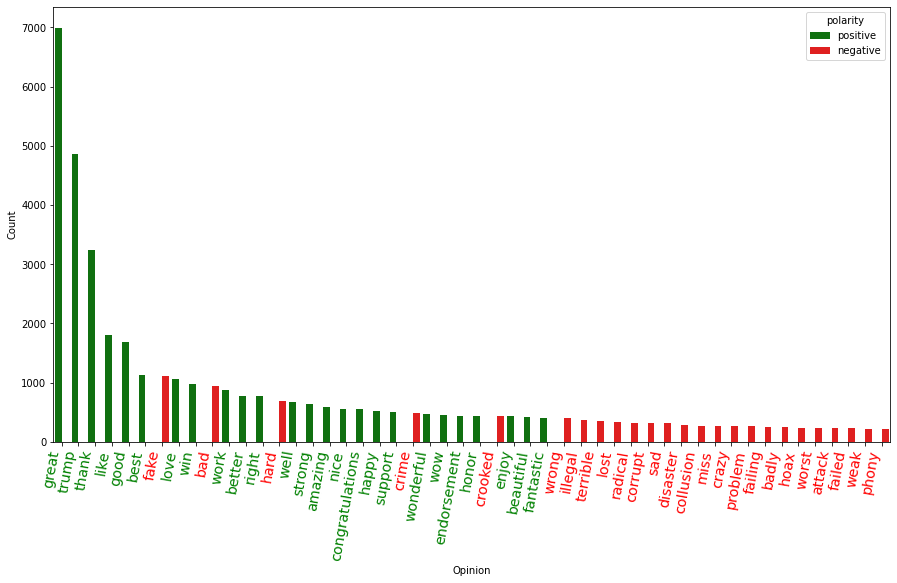

In [ ]:
## Plot of top positives and negatives words in Donald Trump's original tweets

plot_opinion(list_top_positives_opinion_ot, list_top_negatives_opinion_ot)

In [ ]:
## Compute the global sentiment score

# sentiment score = count of positive words used - count of negative words used
sentiment_score_ot = rdd_positive_words_ot_count_kv.map(lambda tuple: tuple[1]).sum()\
                  - rdd_negative_words_ot_count_kv.map(lambda tuple: tuple[1]).sum()

print('The sentiment score is : ',sentiment_score_ot)

The sentiment score is :  23496


In [ ]:
## Get the contextual words

contextual_words_ot = rdd_original_tweets_words_lower.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                        .subtract(references).subtract(hashtags)

In [ ]:
## Top 50 Contextual Words/ Hot Topics

contextual_words_count_ordered_ot = contextual_words_ot.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

list_top_contextual_words_ot = contextual_words_count_ordered_ot.take(50)  

list_top_contextual_words_ot

[('&amp', 4814),
 ('people', 2903),
 ('just', 2898),
 ('president', 2871),
 ('new', 2081),
 ('country', 1984),
 ('big', 1899),
 ('america', 1813),
 ('thanks', 1798),
 ('donald', 1730),
 ('make', 1686),
 ('time', 1625),
 ('news', 1484),
 ('obama', 1455),
 ('vote', 1421),
 ('going', 1368),
 ('want', 1214),
 ('today', 1208),
 ('democrats', 1192),
 ('run', 1162),
 ('job', 1136),
 ('need', 1080),
 ('doing', 1051),
 ('years', 1031),
 ('china', 1022),
 ('think', 1014),
 ('really', 1014),
 ('american', 997),
 ('u.s', 975),
 ('way', 973),
 ('know', 915),
 ('did', 909),
 ('true', 888),
 ('media', 868),
 ('jobs', 868),
 ('said', 844),
 ("don't", 843),
 ('hillary', 838),
 ('day', 838),
 ('border', 831),
 ('world', 828),
 ('deal', 823),
 ('states', 799),
 ('total', 783),
 ('state', 779),
 ('tonight', 768),
 ('house', 764),
 ('got', 752),
 ('election', 741),
 ('united', 735)]

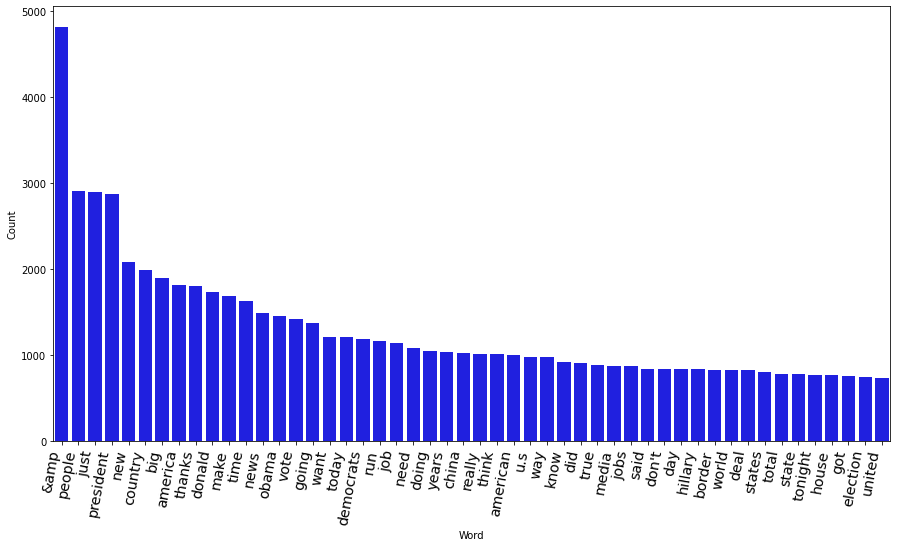

In [ ]:
## Plot of Top 50 Contextual Words in Donald Trump's original tweets

plot_contextual_words(list_top_contextual_words_ot)

In [ ]:
# Split each tweet into words
words_rt = rdd_retweets.flatMap(lambda word:re.split(',| |\[|\]|,|:|;|\.|\"', word.strip())).flatMap(lambda line: line.split(" "))

# Filter the words to get only hashtags, then map each hashtag to be a pair of (hashtag,1)
hashtags_rt = words_rt.filter(lambda w: '#' in w).map(lambda x: (x, 1))

## Top 10 Hashtags of Retweets
hashtags_rt_count = hashtags_rt.reduceByKey(lambda x,y : x+y).sortBy(lambda tuple: tuple[1], ascending=False)
hashtags_rt_count.take(10)

[('#MAGA', 69),
 ('#COVID19', 60),
 ('#USMCA', 32),
 ('#Dorian', 29),
 ('#coronavirus', 27),
 ('#PaycheckProtectionProgram', 21),
 ('#impeachment', 17),
 ('#BREAKING', 15),
 ('#Florence', 15),
 ('#Trump2016', 14)]

In [ ]:
# Filter the words to get only references, then map each reference to be a pair of (reference,1)
references_rt = words_rt.filter(lambda w: '@' in w).map(lambda x: (x, 1))

### Top 10 references of Retweets

references_rt_count = references_rt.reduceByKey(lambda x,y : x+y).sortBy(lambda tuple: tuple[1], ascending=False)
references_rt_count.take(10)


[('@realDonaldTrump', 2382),
 ('@WhiteHouse', 694),
 ('@TeamTrump', 286),
 ('@GOPChairwoman', 217),
 ('@DanScavino', 168),
 ('@Jim_Jordan', 161),
 ('@POTUS', 150),
 ('@GOP', 148),
 ('@DonaldJTrumpJr', 137),
 ('@dbongino', 134)]

In [ ]:
# Split the retweets into a word list and filter the punctuation

rdd_retweets_words = rdd_retweets.flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')

# Delete "https" contents of the retweets

rdd_retweets_words = rdd_retweets_words.filter(lambda line: delhttps(line) != 1)

# Transform all the words into lowercase

rdd_retweets_words_lower = rdd_retweets_words.flatMap(lambda word:word.lower().split())
rdd_retweets_words_lower.take(50)

['rt',
 '@cbs_herridge',
 'read',
 'letter',
 'to',
 'surveillance',
 'court',
 'obtained',
 'by',
 'cbs',
 'news',
 'questions',
 'where',
 'there',
 'will',
 'be',
 'further',
 'disciplinary',
 'action',
 'and',
 'cho…',
 '17/01/2020',
 '03:22:47',
 'rt',
 '@mzhemingway',
 'very',
 'friendly',
 'telling',
 'of',
 'events',
 'here',
 'about',
 "comey's",
 'apparent',
 'leaking',
 'to',
 'compliant',
 'media',
 'if',
 'you',
 'read',
 'those',
 'articles',
 'and',
 'tho…',
 '17/01/2020',
 '13:13:59',
 'rt',
 '@whitehouse',
 'president']

In [ ]:
# initialize an rdd with key/value for counting each word in the retweets 

rdd_retweets_words_kv = rdd_retweets_words_lower.map(lambda word: (word, 1))

rdd_retweets_words_kv.take(10)

[('rt', 1),
 ('@cbs_herridge', 1),
 ('read', 1),
 ('letter', 1),
 ('to', 1),
 ('surveillance', 1),
 ('court', 1),
 ('obtained', 1),
 ('by', 1),
 ('cbs', 1)]

In [ ]:
## Join the cleaned word list with the positive word list
# Use the mapValues transformation to assign a default count of 1 for each positive word

rdd_positive_words_rt_kv = rdd_retweets_words_kv.join(rdd_positive_words_kv).mapValues(lambda tuple: 1)

## Count the number of occurences of each positive word in retweets

rdd_positive_words_rt_count_kv = rdd_positive_words_rt_kv.reduceByKey(lambda x,y : x+y)

rdd_positive_words_rt_count_kv.take(5)

[('right', 132), ('good', 117), ('like', 184), ('safe', 38), ('effective', 12)]

In [ ]:
## Top 25 positive words of retweets

rdd_positive_words_rt_count_kv_ordered = rdd_positive_words_rt_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_positives_opinion_rt = rdd_positive_words_rt_count_kv_ordered.take(25)

list_top_positives_opinion_rt

[('trump', 1030),
 ('great', 415),
 ('thank', 279),
 ('like', 184),
 ('support', 156),
 ('right', 132),
 ('good', 117),
 ('work', 114),
 ('best', 107),
 ('win', 91),
 ('love', 85),
 ('strong', 84),
 ('incredible', 74),
 ('protect', 70),
 ('happy', 67),
 ('proud', 67),
 ('important', 65),
 ('approval', 64),
 ('honor', 63),
 ('better', 63),
 ('clear', 62),
 ('well', 54),
 ('amazing', 54),
 ('supreme', 51),
 ('congratulations', 49)]

In [ ]:
## Join the cleaned word list with the negative word list
# Use the mapValues transformation to assign a default count of 1 for each negative word

rdd_negative_words_rt_kv = rdd_retweets_words_kv.join(rdd_negative_words_kv).mapValues(lambda tuple:1)

## Count the number of occurences of each negative word in retweets

rdd_negative_words_rt_count_kv = rdd_negative_words_rt_kv.reduceByKey(lambda x,y: x+y)

rdd_negative_words_rt_count_kv.take(5)

[('dishonest', 8),
 ('lost', 35),
 ('fraud', 46),
 ('killed', 31),
 ('epidemic', 7)]

In [ ]:
## Top 25 negative words of retweets

rdd_negative_words_rt_count_kv_ordered = rdd_negative_words_rt_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_negatives_opinion_rt = rdd_negative_words_rt_count_kv_ordered.take(25)

list_top_negatives_opinion_rt

[('breaking', 138),
 ('fake', 92),
 ('radical', 65),
 ('collusion', 62),
 ('hard', 61),
 ('impeach', 51),
 ('sham', 50),
 ('crime', 50),
 ('illegal', 49),
 ('crisis', 48),
 ('hoax', 47),
 ('fraud', 46),
 ('abuse', 46),
 ('partisan', 46),
 ('critical', 46),
 ('bad', 45),
 ('attack', 44),
 ('wrong', 42),
 ('lies', 40),
 ('destroy', 38),
 ('false', 36),
 ('corrupt', 36),
 ('failed', 36),
 ('lost', 35),
 ('corruption', 33)]

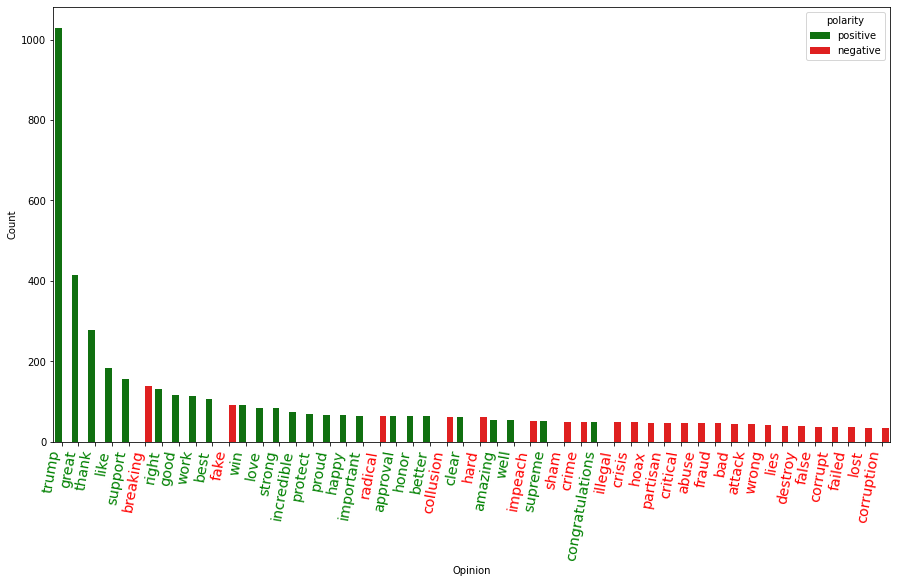

In [ ]:
## Plot of top positives and negatives words in Donald Trump's retweets

plot_opinion(list_top_positives_opinion_rt, list_top_negatives_opinion_rt)

In [ ]:
## Compute the global sentiment score

# sentiment score = count of positive words used - count of negative words used
sentiment_score_rt = rdd_positive_words_rt_count_kv.map(lambda tuple: tuple[1]).sum()\
                  - rdd_negative_words_rt_count_kv.map(lambda tuple: tuple[1]).sum()

print('The sentiment score is : ',sentiment_score_rt)

The sentiment score is :  1866


In [ ]:
## Get the contextual words

contextual_words_rt = rdd_retweets_words_lower.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                        .subtract(references.map(lambda word:word.lower())).subtract(hashtags)

In [ ]:
## Top 50 Contextual Words/ Hot Topics

contextual_words_count_ordered_rt = contextual_words_rt.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

list_top_contextual_words_rt = contextual_words_count_ordered_rt.take(50)  

list_top_contextual_words_rt

[('rt', 9794),
 ('president', 1454),
 ('&amp', 646),
 ('democrats', 488),
 ('biden', 394),
 ('american', 392),
 ('just', 386),
 ('new', 385),
 ('people', 384),
 ('today', 366),
 ('impeachment', 328),
 ('america', 296),
 ('joe', 284),
 ('news', 258),
 ('house', 257),
 ('media', 232),
 ('senate', 215),
 ('time', 206),
 ('day', 202),
 ('vote', 198),
 ('live', 191),
 ('years', 185),
 ('want', 181),
 ('fbi', 180),
 ('election', 175),
 ('country', 175),
 ('americans', 170),
 ('obama', 166),
 ('says', 164),
 ('watch', 163),
 ('did', 162),
 ('coronavirus', 160),
 ('schiff', 160),
 ('it’s', 155),
 ('state', 155),
 ('make', 149),
 ('national', 147),
 ('u.s', 146),
 ('know', 144),
 ('states', 142),
 ('said', 141),
 ('going', 141),
 ('big', 140),
 ('economy', 134),
 ('united', 132),
 ('jobs', 129),
 ('help', 125),
 ('pelosi', 123),
 ('report', 123),
 ('republican', 122)]

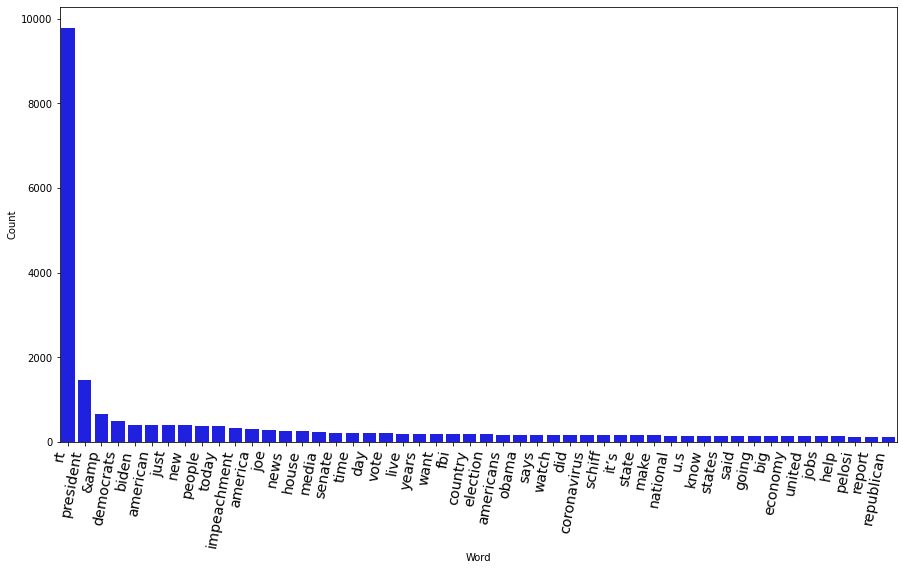

In [ ]:
## Plot of Top 50 Contextual Words in Donald Trump's tweets

plot_contextual_words(list_top_contextual_words_rt)

In [ ]:
for y in range(2009,2021):
    year = '/' + str(y)
    print ('The number of tweets in ', y , ' : ' , rdd_tweets.filter(lambda line : re.search(year,line)).count())

The number of tweets in  2009  :  56
The number of tweets in  2010  :  142
The number of tweets in  2011  :  773
The number of tweets in  2012  :  3531
The number of tweets in  2013  :  8144
The number of tweets in  2014  :  5784
The number of tweets in  2015  :  7536
The number of tweets in  2016  :  4228
The number of tweets in  2017  :  2604
The number of tweets in  2018  :  3569
The number of tweets in  2019  :  7818
The number of tweets in  2020  :  11337


In [ ]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2012 = rdd_tweets.filter(lambda line : re.search('/2012',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2012 = rdd_tweets_2012.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags)

In [ ]:
## Top 50 Contextual Words/ Hot Topics of 2012

contextual_words_2012_ordered = contextual_words_2012.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2012_ordered.take(50)  

[('(cont)', 349),
 ('obama', 345),
 ('&amp', 251),
 ('china', 167),
 ('just', 156),
 ('interview', 130),
 ('people', 121),
 ('new', 117),
 ('time', 116),
 ('thanks', 110),
 ('discussing', 103),
 ("don't", 103),
 ('president', 97),
 ('america', 86),
 ("it's", 85),
 ('make', 82),
 ('night', 78),
 ('country', 76),
 ('did', 76),
 ('deal', 76),
 ('job', 75),
 ('big', 74),
 ('going', 73),
 ('record', 68),
 ('election', 68),
 ('watch', 68),
 ('jobs', 67),
 ('really', 67),
 ('real', 66),
 ('think', 66),
 ("obama's", 65),
 ('need', 63),
 ('17/10/2012', 63),
 ('doing', 62),
 ('money', 62),
 ('world', 61),
 ("can't", 60),
 ('years', 60),
 ('gas', 60),
 ('donald', 60),
 ('tonight', 57),
 ('today', 56),
 ('season', 55),
 ('06/12/2012', 53),
 ('year', 53),
 ('tax', 52),
 ('million', 52),
 ('26/10/2012', 51),
 ('national', 51),
 ('said', 50)]

In [ ]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2013 = rdd_tweets.filter(lambda line : re.search('/2013',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2013 = rdd_tweets_2013.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags)

In [ ]:
## Top 50 Contextual Words/ Hot Topics of 2013


contextual_words_2013_ordered = contextual_words_2013.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2013_ordered.take(50) 

[('thanks', 1102),
 ('&amp', 590),
 ('just', 416),
 ('think', 331),
 ('people', 329),
 ('donald', 304),
 ('obama', 291),
 ('true', 289),
 ('president', 271),
 ('time', 255),
 ('big', 241),
 ('new', 240),
 ('really', 208),
 ("don't", 207),
 ('going', 206),
 ('country', 193),
 ('run', 164),
 ('obamacare', 162),
 ('make', 156),
 ('know', 155),
 ('doing', 138),
 ('job', 137),
 ("you're", 135),
 ('need', 133),
 ("i'm", 133),
 ('mr', 132),
 ('did', 130),
 ('golf', 126),
 ('day', 121),
 ('apprentice', 119),
 ('course', 119),
 ("it's", 117),
 ('want', 117),
 ('money', 117),
 ('yes', 115),
 ('world', 115),
 ('thanks.', 113),
 ('man', 111),
 ("can't", 110),
 ('way', 108),
 ('business', 107),
 ('today', 107),
 ('deal', 104),
 ('hope', 103),
 ('look', 103),
 ('china', 103),
 ('say', 100),
 ('27/02/2013', 100),
 ('celebrity', 99),
 ('tonight', 99)]

In [ ]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2014 = rdd_tweets.filter(lambda line : re.search('/2014',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2014 = rdd_tweets_2014.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags)

In [ ]:
## Top 50 Contextual Words/ Hot Topics of 2014

contextual_words_2014_ordered = contextual_words_2014.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2014_ordered.take(50)  

[('president', 585),
 ('&amp', 503),
 ('donald', 460),
 ('run', 399),
 ('just', 321),
 ('obama', 304),
 ('thanks', 277),
 ('country', 226),
 ('need', 218),
 ('new', 212),
 ('mr', 211),
 ('think', 204),
 ('vote', 195),
 ('people', 187),
 ('true', 182),
 ('make', 182),
 ('you.', 181),
 ('thanks.', 168),
 ('course', 163),
 ('golf', 160),
 ('2016', 160),
 ("don't", 159),
 ('time', 153),
 ('man', 141),
 ('know', 135),
 ("it's", 133),
 ("i'm", 131),
 ('world', 127),
 ("can't", 125),
 ('america', 123),
 ('business', 122),
 ('big', 122),
 ('really', 118),
 ('going', 116),
 ('needs', 112),
 ("you're", 108),
 ('way', 108),
 ('day', 106),
 ('hotel', 102),
 ('real', 96),
 ('u', 93),
 ('today', 91),
 ('looking', 91),
 ('agree', 91),
 ('u.s', 90),
 ('got', 90),
 ('job', 89),
 ('ebola', 89),
 ('deal', 89),
 ('17/06/2014', 88)]

In [ ]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2015 = rdd_tweets.filter(lambda line : re.search('/2015',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2015 = rdd_tweets_2015.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags)


In [ ]:
## Top 50 Contextual Words/ Hot Topics of 2015

contextual_words_2015_ordered = contextual_words_2015.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2015_ordered.take(50) 

[('donald', 654),
 ('&amp', 537),
 ('president', 514),
 ('america', 478),
 ('just', 424),
 ('make', 390),
 ('run', 365),
 ('people', 318),
 ('need', 290),
 ('new', 289),
 ('country', 287),
 ('time', 249),
 ('vote', 247),
 ('mr', 221),
 ("don't", 217),
 ('poll', 214),
 ('tonight', 203),
 ('going', 196),
 ("can't", 191),
 ('thanks', 184),
 ('really', 177),
 ("it's", 174),
 ('big', 167),
 ('want', 167),
 ('05/01/2015', 160),
 ('know', 159),
 ('think', 159),
 ("i'm", 155),
 ('needs', 150),
 ('2016', 146),
 ('watch', 145),
 ('hope', 141),
 ('said', 135),
 ('true', 135),
 ('man', 133),
 ('job', 132),
 ('debate', 131),
 ('hillary', 131),
 ('wait', 128),
 ('jeb', 128),
 ('real', 128),
 ('donaldtrump', 128),
 ('obama', 126),
 ('night', 124),
 ('entrepreneurs', 122),
 ('apprentice', 120),
 ('way', 119),
 ('06/01/2015', 118),
 ('u', 116),
 ("you're", 114)]

In [ ]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2016 = rdd_tweets.filter(lambda line : re.search('/2016',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2016 = rdd_tweets_2016.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags.map(lambda word:word.lower()))

In [ ]:
## Top 50 Contextual Words/ Hot Topics of 2016

contextual_words_2016_ordered = contextual_words_2016.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2016_ordered.take(50) 

[('hillary', 449),
 ('&amp', 371),
 ('just', 284),
 ('america', 282),
 ('people', 274),
 ('clinton', 262),
 ('make', 248),
 ('new', 238),
 ('rt', 194),
 ('cruz', 182),
 ('join', 176),
 ('vote', 175),
 ('big', 163),
 ('today', 144),
 ('president', 136),
 ('going', 136),
 ('time', 130),
 ('ted', 125),
 ('tonight', 124),
 ('country', 115),
 ('tomorrow', 108),
 ('media', 102),
 ('said', 102),
 ('watch', 101),
 ('poll', 100),
 ('campaign', 97),
 ('jobs', 88),
 ('night', 87),
 ('20/10/2016', 87),
 ('ohio', 86),
 ('iowa', 83),
 ('speech', 83),
 ("don't", 80),
 ('want', 80),
 ('florida', 78),
 ('rally', 78),
 ('carolina', 78),
 ('job', 76),
 ('000', 76),
 ('obama', 76),
 ('way', 76),
 ('debate', 74),
 ('american', 74),
 ('donald', 73),
 ('did', 73),
 ('rubio', 72),
 ('republican', 72),
 ('bernie', 72),
 ('state', 71),
 ('day', 70)]

In [ ]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2017 = rdd_tweets.filter(lambda line : re.search('/2017',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2017 = rdd_tweets_2017.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags.map(lambda word:word.lower()))

In [ ]:
## Top 50 Contextual Words/ Hot Topics of 2017

contextual_words_2017_ordered = contextual_words_2017.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2017_ordered.take(50) 

[('&amp', 471),
 ('rt', 311),
 ('news', 203),
 ('people', 202),
 ('just', 171),
 ('today', 164),
 ('big', 162),
 ('tax', 152),
 ('america', 151),
 ('president', 147),
 ('u.s', 135),
 ('country', 130),
 ('american', 125),
 ('jobs', 125),
 ('media', 108),
 ('time', 104),
 ('new', 102),
 ('make', 97),
 ('democrats', 87),
 ('day', 86),
 ('years', 86),
 ('house', 81),
 ('working', 81),
 ('national', 76),
 ('election', 75),
 ('going', 75),
 ('cuts', 74),
 ('united', 74),
 ('russia', 74),
 ('healthcare', 72),
 ('obamacare', 70),
 ('want', 68),
 ('korea', 68),
 ('military', 66),
 ('vote', 66),
 ('north', 65),
 ('republicans', 64),
 ('dems', 63),
 ('states', 62),
 ('republican', 61),
 ('security', 59),
 ('job', 57),
 ('year', 57),
 ('meeting', 56),
 ('senate', 55),
 ('help', 54),
 ('obama', 54),
 ('state', 53),
 ('china', 52),
 ('way', 50)]

In [ ]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2018 = rdd_tweets.filter(lambda line : re.search('/2018',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2018 = rdd_tweets_2018.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags.map(lambda word:word.lower()))

In [ ]:
## Top 50 Contextual Words/ Hot Topics of 2018

contextual_words_2018_ordered = contextual_words_2018.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2018_ordered.take(50) 

[('&amp', 518),
 ('rt', 464),
 ('people', 458),
 ('president', 349),
 ('country', 320),
 ('just', 320),
 ('democrats', 282),
 ('news', 268),
 ('border', 267),
 ('big', 265),
 ('u.s', 234),
 ('today', 203),
 ('new', 201),
 ('time', 199),
 ('trade', 197),
 ('vote', 197),
 ('want', 196),
 ('america', 186),
 ('military', 181),
 ('make', 164),
 ('american', 159),
 ('years', 158),
 ('job', 157),
 ('doing', 157),
 ('state', 154),
 ('united', 154),
 ('security', 151),
 ('fbi', 150),
 ('states', 147),
 ('house', 145),
 ('going', 145),
 ('don’t', 143),
 ('media', 139),
 ('witch', 138),
 ('wall', 135),
 ('hunt', 135),
 ('jobs', 132),
 ('total', 131),
 ('election', 126),
 ('russia', 122),
 ('need', 121),
 ('deal', 117),
 ('obama', 116),
 ('way', 116),
 ('north', 115),
 ('day', 114),
 ('really', 113),
 ('campaign', 112),
 ('world', 112),
 ('dems', 107)]

In [ ]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2019 = rdd_tweets.filter(lambda line : re.search('/2019',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2019 = rdd_tweets_2019.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references).subtract(hashtags.map(lambda word:word.lower()))

In [ ]:
## Top 50 Contextual Words/ Hot Topics of 2019

contextual_words_2019_ordered = contextual_words_2019.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2019_ordered.take(50) 

[('rt', 3021),
 ('president', 1045),
 ('&amp', 1032),
 ('democrats', 750),
 ('people', 609),
 ('just', 563),
 ('new', 474),
 ('news', 440),
 ('country', 436),
 ('impeachment', 409),
 ('big', 390),
 ('border', 388),
 ('time', 339),
 ('years', 326),
 ('want', 319),
 ('media', 318),
 ('today', 318),
 ('american', 316),
 ('united', 305),
 ('china', 296),
 ('house', 295),
 ('america', 272),
 ('don’t', 272),
 ('states', 271),
 ('doing', 260),
 ('dems', 250),
 ('u.s', 250),
 ('going', 231),
 ('said', 224),
 ('schiff', 220),
 ('did', 219),
 ('job', 217),
 ('deal', 217),
 ('republican', 215),
 ('make', 209),
 ('day', 202),
 ('history', 201),
 ('know', 200),
 ('state', 196),
 ('democrat', 196),
 ('party', 195),
 ('way', 189),
 ('mueller', 189),
 ('vote', 188),
 ('economy', 185),
 ('congress', 184),
 ('report', 183),
 ('wall', 177),
 ('republicans', 176),
 ('witch', 176)]

In [ ]:
# Split the original tweets into a word list and filter the punctuation
rdd_tweets_2020 = rdd_tweets.filter(lambda line : re.search('/2020',line))\
                    .flatMap(split_with_multiple_separator).filter(lambda word: word!='' and word!='”' and word!='.')\
                    .filter(lambda line: delhttps(line) != 1).flatMap(lambda word:word.lower().split())

## Get the contextual words
contextual_words_2020 = rdd_tweets_2020.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)\
                    .subtract(references.map(lambda word:word.lower())).subtract(hashtags.map(lambda word:word.lower()))

In [ ]:
## Top 50 Contextual Words/ Hot Topics of 2020

contextual_words_2020_ordered = contextual_words_2020.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

contextual_words_2020_ordered.take(50) 

[('rt', 4369),
 ('&amp', 1138),
 ('president', 1005),
 ('people', 722),
 ('biden', 696),
 ('just', 570),
 ('joe', 560),
 ('news', 537),
 ('new', 454),
 ('big', 435),
 ('democrats', 425),
 ('vote', 403),
 ('american', 392),
 ('america', 343),
 ('country', 340),
 ('election', 316),
 ('today', 306),
 ('state', 304),
 ('going', 299),
 ('media', 286),
 ('want', 281),
 ('states', 277),
 ('make', 271),
 ('years', 269),
 ('total', 263),
 ('house', 256),
 ('job', 255),
 ('time', 245),
 ('coronavirus', 238),
 ('way', 234),
 ('left', 233),
 ('doing', 231),
 ('did', 231),
 ('complete', 230),
 ('china', 228),
 ('history', 209),
 ('military', 206),
 ('law', 205),
 ('democrat', 204),
 ('federal', 202),
 ('republican', 202),
 ('jobs', 199),
 ('senate', 199),
 ('national', 199),
 ('said', 195),
 ('don’t', 195),
 ('got', 189),
 ('help', 185),
 ('day', 182),
 ('sleepy', 174)]

The focus of this analysis is to identify the characteristics of Donald Trump’s, the President of the United States of America, communication from 2009 to 2020. The conclusion are drawn from evaluating hashtags, references and hot topics by overall and partial analysis (original tweets, retweets, tweets in each year):

Donald Trump has been tweeting more than 58000 tweets over 12 years in which 80% are his original tweets. On average, he tends to use positive words than negative words in both original tweets and retweets.

The hot topics over 12 years can be grouped into either politics or his personal life : 1) Politics :

Former President Obama
Obamacare
2016 Presidential Election
2020 Presidential Election
Impeachment of President Donald Trump
Trade war between U.S and China
Relationship between U.S and Mexico
Relationship between U.S and North Korea
Relationship between U.S and Russia
international deals with Middle East
2) His personal life :

celebrity apprentice (TV Shows)
Golf
Court case
His real estates, i.e. buildings and hotels
From 2012 to 2015, Donald Trump's tweets included political, economic and entertaining topics. In the next few years, especially after he took office as president, there were almost no personal life and economy topics but more about politics. Donald Trump used Twitter as a tool for reaching his political goals and refuting the accuses from his opponents.

All in all, Donald Trump tweets are used for his political career after 2015.